# Density Plot

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde

In [2]:
def density_plot(ax,x,y,gridsize =[20,20],color="k",cmap="Blues",cbar=True):
    data = np.vstack([x, y])
    kde = gaussian_kde(data)
    # evaluate on a regular grid
    xgrid = np.linspace(x.min(), x.max(), gridsize[0])
    ygrid = np.linspace(y.min(), y.max(), gridsize[1])
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    Zgrid = Z.reshape(Xgrid.shape)/Z.sum()
    cs1 = ax.contour(Xgrid, Ygrid, Zgrid,colors=["grey"])#,levels=[0.01,0.03]
    cs = ax.contourf(Xgrid, Ygrid, Zgrid,cmap="afmhot_r")
    ax.clabel(cs1, inline=1, fontsize=10)
    if cbar:
        cb=plt.colorbar(cs,ax=ax)
        #cb = plt.colorbar(h)
        cb.set_label("Density")
    return cs

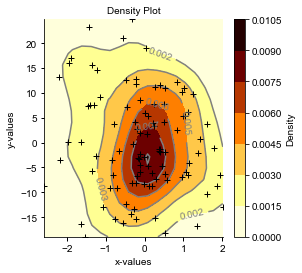

In [3]:
% run figconfig.py
mean = [0, 0]
cov = [[1, 0], [0, 100]]  
x, y = np.random.multivariate_normal(mean, cov, 100).T
fig, ax = plt.subplots(1,1,figsize=(4,4))
cs=density_plot(ax,x,y,[20,20],"b","Greys",False)
cb=fig.colorbar(cs)
cb.set_label("Density")
ax.plot(x,y,"k+")
stylize_axes(ax, "Density Plot", "x-values", "y-values", xticks=[], yticks=[], xticklabels=[], yticklabels=[])